Data source: https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

## Part 1: Exploratory Data Analysis

### Load Data

In [3]:
import pandas as pd

df = pd.read_csv('bank_churn.csv')
df.head().append(df.tail())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand Raw Data

In [4]:
df.info()

# 10000 rows, 14 columns, no missing data (all 10000 non-null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Define the dependent variable

In [5]:
y = df['Exited']

#### Check % of "Exited"

In [6]:
print(sum(y) / len(y))

# 2037 "Exited" rows

0.2037


### Understand the numerical variables

In [8]:
df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


### Visualize these numerical variables
- Use Boxplot

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#### make boxplots for the above 6 features

Expect: One plot contains the boxplot of the Exited & non-Exited group side by side

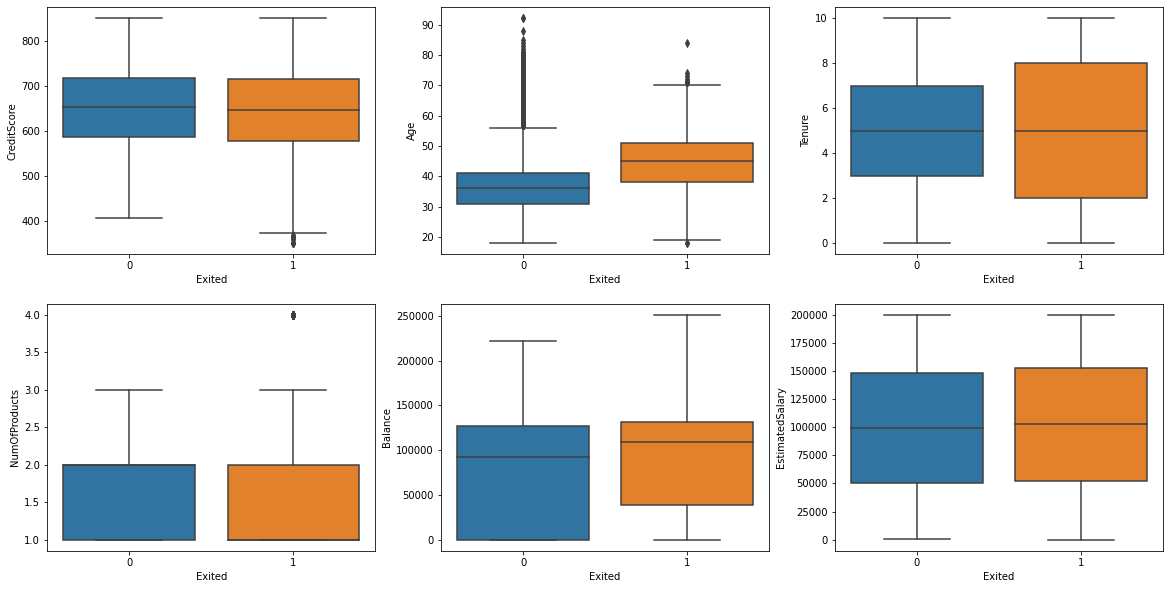

In [10]:
# Define a 2 x 3 sub-plot setup
_, axss = plt.subplots(2,3, figsize=[20, 10])

sns.boxplot(x='Exited', y ='CreditScore', data=df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=df, ax=axss[1][2])

### Visualize the categorical features

- Geography, Gender, HasCrCard, IsActiveMember
- Use **Countplot** rather than boxplot

categorical variables 没有数值，只有对 level 的 count。plot 的结果依然分成 Exited 和 non-Exited 两组。

注意因为两组的 data size 不一样 (80/20)，所以 across group 的 count 用处有限，要看 within-group 的关系对比。

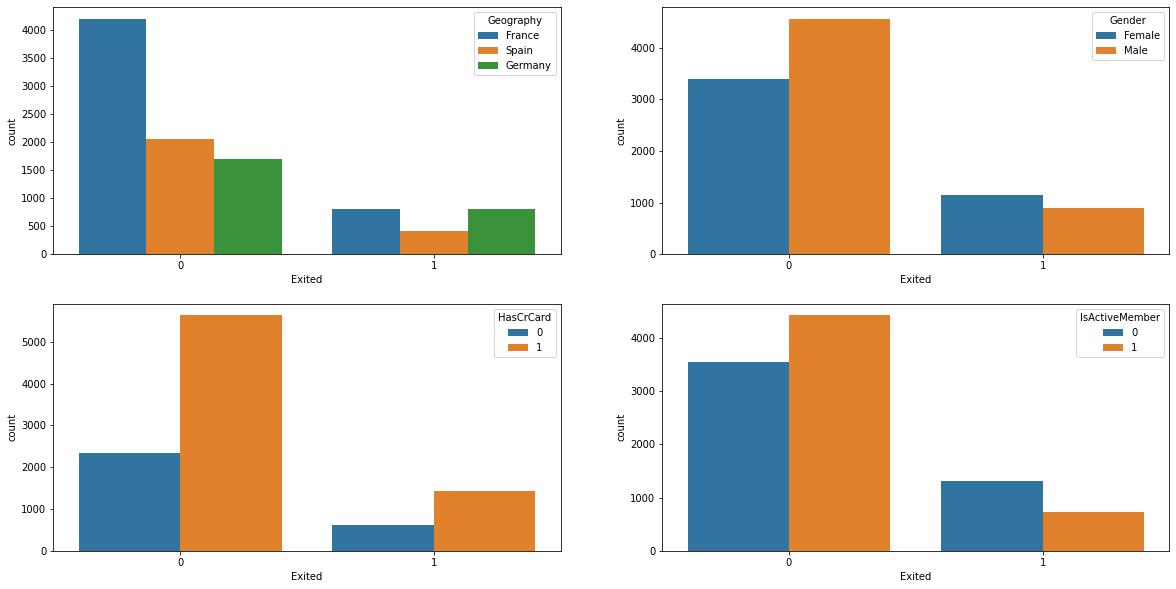

In [12]:
_, axss = plt.subplots(2, 2, figsize=[20, 10])

sns.countplot(x='Exited', hue='Geography', data=df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=df, ax=axss[1][1])

### Visualize correlation
- Heatmap

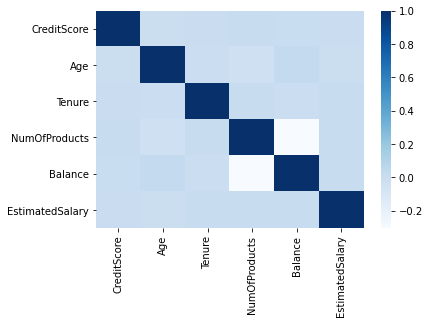

In [18]:
# correlations between features
corr_score = df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()

# show heapmap of correlations
sns.heatmap(corr_score, cmap="Blues")

# 基本都是弱相关。NumOfProducts 和 Balance 呈明显负相关（但还是弱的）。
# 具体的可以直接看 corr_score

In [15]:
corr_score

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


### Dropping useless columns and the y-variable

In [25]:
drop_cols = ['RowNumber', 'CustomerId', 'Surname', 'Exited']
X = df.drop(drop_cols, axis=1)

### Do some encodings for categorical variables

In [26]:
# ordinal encoding for gender (Male or Female)
# Suppose 'Female' = True and 'Male' = False

X['Gender'] = X['Gender'] == 'Female'

In [27]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,True,42,2,0.00,1,1,1,101348.88
1,608,Spain,True,41,1,83807.86,1,0,1,112542.58
2,502,France,True,42,8,159660.80,3,1,0,113931.57
3,699,France,True,39,1,0.00,2,0,0,93826.63
4,850,Spain,True,43,2,125510.82,1,1,1,79084.10


In [28]:
# one hot encoding for Geography
# In this dataset, there are only 3 countries (if more countries, then more columns)
# (0, 0, 1), (0, 1, 0), (1, 0, 0) 是等距的

X = pd.get_dummies(X, columns=['Geography'], drop_first=False)
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,True,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,True,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,True,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,True,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,True,43,2,125510.82,1,1,1,79084.10,0,0,1


## Part 2: Model Training

### Split training and test data (suppose 80/20)

In [29]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

# stratify: default None, if not, data is split in a stratified fashion.

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 8000 observation with 12 features
test data has 2000 observation with 12 features


In [33]:
print(y_train.sum())
print(y_test.sum())

# stratify 的效果：y=1 在各自 training data 和 test data 中，是 close to total y=1 ratio 的 （20.37%）

1630
407


### Standardization for training and test data

#### Why scaling the data (by standardization)?

1. speed up gradient descent
2. same scale
3. algorithm requirments

附注：<br>
standardization 是 (x-mean)/std <br>
normalization 是 (x-x_min)/(x_max-x_min) -> [0,1]

#### How to do standardization? (For example)

Step 1: use training data to **train** the standardscaler to get mean and std

Step 2: apply the mean and std to both training and test data

.fit() does the training, .transform() does the applying.

Reference: <br>
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py <br>
https://scikit-learn.org/stable/modules/preprocessing.html

In [34]:
from sklearn.preprocessing import StandardScaler

# fit
scaler = StandardScaler()
scaler.fit(X_train)

# transform
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Invoke the Algorithms

In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier()

### Logistic Regression

Docs: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### Fit training data

classifier_logistic 这个对象，已经在上一步被创建出来了，直接 call 这个 class 里面的 fit 方法，以 X_train, y_train 为参数，就行了。

不需要 xxx_model = classifier_logistic.fit(.)

In [38]:
classifier_logistic.fit(X_train, y_train)

# Read the output for default setting of hyper-parameters

# L1_ratio is None. --> 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'

# Penalty is L2. Could be "l1, l2, elasticnet, none". (None means no regularization.)
# (elastic net 是 L1 + L2, 具体 objective function 看 docs)

# C = 1.0 --> 1/lambda (inverse of reg-strength) (smaller values --> stronger regularization)

# max_iter = 100

# tolerance = 0.0001 to define convergence

# solver = 'lbfgs'  --> iterative method for solving unconstrained nonlinear optimization (support l2 only)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Use this model on X_test to make predictions

实际上我们可以 cross validation 以及 grid search 去 tune 这个 model 的 hyper-parameters.

因为把 model 用在 test data 只能用一次，不可以通过 test data 的 accuracy 再去调整模型。

这里比较粗略的直接跳过了。

In [40]:
# predict on test data
# Return predict 的结果
pred_by_logistic = classifier_logistic.predict(X_test)
pred_by_logistic

array([0, 0, 0, ..., 0, 0, 0])

也可以直接 print accuracy score

更多的 evaluate result 的方法，会在下面的 model evaluation 用到

In [41]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.8125

#### Use 5-fold cross validation to get the accuracy score

每个模型没有 tuning process，就是单纯的数据分5份，取得5个 accuracy score on the test data，然后平均。

Repeat for each model. 这步只是粗略的全部跑一遍。

In [42]:
model_names = ['Logistic Regression', 'KNN', 'Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is 0.8098749999999999
Model accuracy of KNN is 0.8241250000000001
Model accuracy of Random Forest is 0.8626250000000001


大致一看，Random Forest 最好。当然这个没有 model tuning，全部是最基础的掉包 fit model。

### Try on SVM?

In [43]:
from sklearn.svm import SVC

In [44]:
classifier_SVC = SVC(probability=True)

cv_score = model_selection.cross_val_score(classifier_SVC, X_train, y_train, cv=5)
print('Model accuracy of SVM is: ' + str(cv_score.mean()))

Model accuracy of SVM is: 0.8571249999999999


## Part 3: Model Tuning

- Grid Search to find optimal hyper-parameters.

In [46]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    """
    gs is a grid-search object.
    """
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### For Logistic Regression

In [47]:
params = {'penalty':('l1', 'l2'), 
          'C':(0.01, 1, 5, 10)}    # Default max_iter = 100

# Since we want to try L1 reg, we can't use 'lbfgs' solver which only supports L2 reg.
# 第一个 argument 直接创建 LogisticRegression(.) 对象就可以了，不用上面的 classifier_logistic.

gs_LR = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid=params, cv=5)

# This is a lazy algorithm. Nothing is run until we use actual data to fit.

In [48]:
# This will take a few seconds.

gs_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
# Extract hyper-parameters of the best LR model
print_grid_search_metrics(gs_LR)

Best score: 0.810125
Best parameters set:
C:1
penalty:l1


In [50]:
# Extract best model
best_LR_model = gs_LR.best_estimator_
best_LR_model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### For KNN

In [54]:
# KNN 的 hyper-parameter 就一个，the number of k，但是 param_grid 的参数叫做 n_neighbors
params_KNN = {'n_neighbors':(1,3,5,7,9)}

# 类似
gs_KNN = GridSearchCV(KNeighborsClassifier(), param_grid=params_KNN, cv=5)

gs_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (1, 3, 5, 7, 9)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
# Extract hyper-parameters of the best KNN model
print_grid_search_metrics(gs_KNN)

Best score: 0.832625
Best parameters set:
n_neighbors:9


In [56]:
# Extract the best KNN model
best_KNN_model = gs_KNN.best_estimator_
best_KNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

#### For Random Forest

In [57]:
# Random Forest 的 hyper-parameters 是 the number of trees，参数叫 n_estimators
params_RF = {'n_estimators': [40,60,80]}

# 类似
gs_RF = GridSearchCV(RandomForestClassifier(), param_grid=params_RF, cv=5)

gs_RF.fit(X_train, y_train)

# Look at other hyper-parameters:

# criterion = 'gini'

# max_depth = None, max_leaf_nodes = None, 所以没有 pruning

# 其他的，min_sample_leaf = 1, min_sample_split = 2

# Default n_estimators = 100

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [58]:
# Extract hyper-parameters of the best RF model
print_grid_search_metrics(gs_RF)

Best score: 0.86175
Best parameters set:
n_estimators:80


In [59]:
# Extract the best random forest model
best_RF_model = gs_RF.best_estimator_
best_RF_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Part 4: Model Evaluation 
- Confusion Matrix
- ROC

Review:

Precision = tp / (tp + fp). A high precision model means low fp, meaning that out of all +ve cases predicted, very few  are wrong. (i.e. many positive cases claimed are truly positive)，冤案很少。(many customers who are predicted to churn truly exited. 预计流失结果stay的case很少)

Recall = tp / (tp + fn). A high recall model means low fn, meaning that out of all -ve cases predicted, very few are wrong (i.e. most negative cases claimed are truly negative)，漏网之鱼很少。(many customers who are predicted to stay truly stayed，预计stay结果流失的case很少)

### Confusion Matrix

In [60]:
# Import packages

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [65]:
# Calculate the entries of confusion matrix, and print them out

def cal_evaluation(classifier, cm):
    """
    classifier: name of the classifier, a str
    cm: confusion_matrix, an array
    """
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier, "\n ========================")
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

In [66]:
# print out confusion matrices

def draw_confusion_matrices(confusion_matricies):
    """
    Take the confusion matrix of each model (input arranged in some format)
    """
    class_names = ['Stay', 'Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        
        cal_evaluation(classifier, cm)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

Random Forest 
Accuracy is: 0.868
precision is: 0.7638376383763837
recall is: 0.5085995085995086


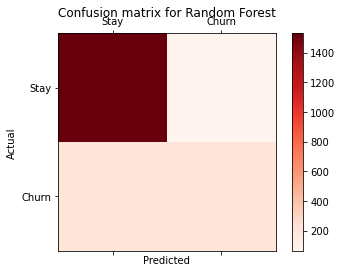

Logistic Regression 
Accuracy is: 0.8125
precision is: 0.5987654320987654
recall is: 0.23832923832923833


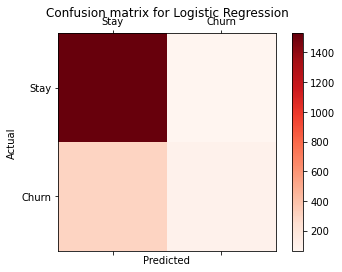

K nearest neighbor 
Accuracy is: 0.834
precision is: 0.6728110599078341
recall is: 0.35872235872235875


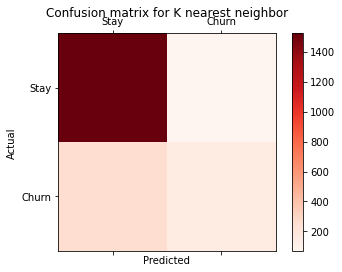

In [67]:
# The confusion matrix will take y_test (the actual) and the y_pred (the predicted value by the best model).
# And then display the confusion matrix

confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test, best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test, best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))]

draw_confusion_matrices(confusion_matrices)

当然，不用 confusion_matrix(.) 这个命令，也可以用 xxx_model.predict_proba(test) 手动计算并存储预测值，然后再手动对比。

### ROC Curve (by calculating TPR and FPR) and the AUC

In [68]:
# Import packages
from sklearn.metrics import roc_curve
from sklearn import metrics    # for AUC

### (以 Random Forest 为例）
#### Step 1: Use predict_proba to get the probability results of Random Forest

In [73]:
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
y_pred_rf

# [:, 1] 是因为 predict_proba(.) return 的是 1-p 和 p.

array([0.075 , 0.025 , 0.0125, ..., 0.0125, 0.075 , 0.3375])

#### Step 2: Calculate TPR and FPR for ROC curve (under different thresholds)

In [74]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

# 注意 return 的顺序，第三个 _ 实际是 threshold，但是这里不会用到。

#### Step 3: Plot ROC Curve

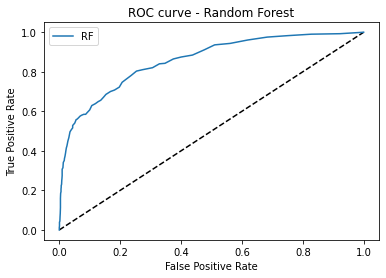

In [75]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Random Forest')
plt.legend(loc='best')
plt.show()

#### Step 4: Calculate Area Under Curve (AUC)

In [77]:
metrics.auc(fpr_rf, tpr_rf)

# 注意 argument 顺序，先放 FPR，后放 TPR

0.857107492700713

### Similarly, for Logistic Regression

In [78]:
# Step 1
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]

# Step 2
fpr_lr, tpr_lr, thres = roc_curve(y_test, y_pred_lr)

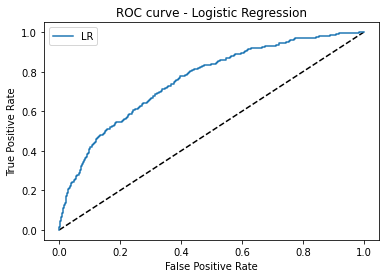

In [80]:
# Step 3
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Logistic Regression')
plt.legend(loc='best')
plt.show()

In [81]:
# Step 4
metrics.auc(fpr_lr, tpr_lr)

0.7579999105422834

### Similarly, for KNN

In [82]:
# Step 1
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]

# Step 2
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

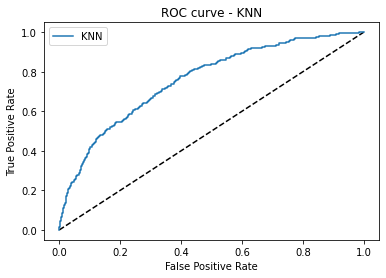

In [83]:
# Step 3
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - KNN')
plt.legend(loc='best')
plt.show()

In [84]:
# Step 4
metrics.auc(fpr_knn, tpr_knn)

0.7831537238316899

## Part 5: Some Discussions on Feature Importance

**Why Feature Importance?**

Training a model that accurately predicts outcomes is great, but most of the time you don't just need predictions, you want to be able to interpret your model.

For example, if you build a model of house prices, knowing which features are most predictive of price tells us which features people are willing to pay for. 

Feature importance is the most useful interpretation tool, and data scientists regularly examine model parameters (such as the coefficients of linear models), to identify important features.

**Implementation**

sklearn 有两个command：feature_importance 和 permutation_importance

这里用的是 feature_importance。

Pros:
- fast calculation
- easy to retrieve — one command

Cons:
- biased approach, as it has a tendency to inflate the importance of continuous features or high-cardinality categorical variables

**permutation_importance**: defined to be the difference between the *baseline metric* and metric from permutating the feature column. Check docs for what is "scoring".

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance


**In the case of Random Forest**, **permutation importance** is a common, reasonably efficient, and very reliable technique. It directly measures variable importance **by observing the effect** on model accuracy **of randomly shuffling each predictor variable**.

This technique is broadly-applicable because it doesn't rely on internal model parameters, such as linear regression coefficients (which are really just poor proxies for feature importance).


**入门应用** <br>
https://machinelearningmastery.com/calculate-feature-importance-with-python/

**More on feature_importance vs. permutation_importance** <br>
https://explained.ai/rf-importance/

In [86]:
X.head()

# All features (12 columns)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,True,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,True,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,True,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,True,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,True,43,2,125510.82,1,1,1,79084.10,0,0,1


In [88]:
feature_importance_RF = best_RF_model.feature_importances_

print(feature_importance_RF)
print(sum(feature_importance_RF))

[0.14209661 0.02025971 0.23448121 0.08357126 0.14520749 0.12829684
 0.01900803 0.0407527  0.14398547 0.01086727 0.02215923 0.00931418]
1.0


In [93]:
import numpy as np

# Sort input_array, and return the indices with the largest --> 2nd largest --> ... --> smallest number

indices = np.argsort(feature_importance_RF)[::-1]
indices

array([ 2,  4,  8,  0,  5,  3,  7, 10,  1,  6,  9, 11])

In [97]:
# Print the features ranking
print("Feature importance ranking in the Random Forest Model: \n")
for i in range(len(indices)):
    print("{0}: {1}".format(X.columns[indices[i]], round(feature_importance_RF[indices[i]], 4)))

Feature importance ranking in the Random Forest Model: 

Age: 0.2345
Balance: 0.1452
EstimatedSalary: 0.144
CreditScore: 0.1421
NumOfProducts: 0.1283
Tenure: 0.0836
IsActiveMember: 0.0408
Geography_Germany: 0.0222
Gender: 0.0203
HasCrCard: 0.019
Geography_France: 0.0109
Geography_Spain: 0.0093


因为这是一个 classification problem，所以衡量标准是 impurity-based。如果是 regression problem，衡量标准是 variance。

feature importance 在这个 impurity-based context 里，解释为 randomly shuffling 每一个 feature，然后 how much each feature contributes to decreasing the weighted impurity。所以 sum = 1。

如果是 regression problem，它的解释就是每一个 feature 能解释多少 variance。所以 sum 也是1.

Decision Tree 就是一个计算，Random Forest 每一棵树的计算然后取平均，所以也有方差。

根据上面的解释，来看下面的红色 bar。

从下图来看，可以说有5个 features 是重要的。

In [1]:
std = np.std([tree.feature_importances_ for tree in best_RF_model.estimators_], axis=0)

plt.figure(figsize=[20, 10])
plt.title("Feature importances")
plt.bar(range(X.shape[1]), 
        feature_importance_RF[indices],
        color="r", 
        yerr=std[indices], 
        align="center")

plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlim([-1, X.shape[1]])
plt.show()

NameError: name 'np' is not defined

#### For Logistic Regression

对于 regression（包括普通的 linear regression 和 logistic regression）来说，因为 y_pred 是 linear combination of coeff * features, 所以 coefficient 的绝对值大小就是一个粗略的 feature importance。

当然有假设，假设这些 feature 已经被 standardize 过，当然又有一个假设，就是这些 feature 都是 continuous variable，因为 categorical variable 没法 standardize。（对于 categorical variable，一般都是 one-hot-encoding，或者类似的其他方法）。

实际上这些 coefficient 乘以一个 std(features) 更好，因为得到的是 standardized beta.

In [ ]:
X_with_corr = X.copy()
X_with_corr['SalaryInRMB'] = X['EstimatedSalary'] * 6.91
X_with_corr.head()

# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
    print("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))
  

Final words:

想清楚你想用什么方法，linear 的方法（用regression），还是 non-linear 的方法（decision tree based）。

Decision tree --> Bagging (e.g. Random Forest) or Bagging

想清楚这是个什么问题，用 regressor （对应 variance explained）还是 classifier （Gini (impurity-based) or entropy reduced）。